In [1]:
# Import libraries and dependencies
import pandas as pd
from pandas.tseries.offsets import DateOffset
import requests
from dotenv import load_dotenv
import os 
import json
import numpy as np
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import panel as pn
from panel.interact import interact
from panel import widgets
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv
%matplotlib inline
pn.extension('plotly')
import hvplot.pandas


Bad key "text.kerning_factor" on line 4 in
C:\Users\gscal\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


## Reading in Data

In [2]:
#Reading in CSV files
BXP_REC1_data = Path("BXP2000.csv")
BXP_REC2_data = Path("BXP2007.csv")
GC_REC1_data = Path("GC_2000.csv")
GC_REC2_data = Path("GC_2007.csv")
HP_REC1_data = Path("hp_2000.csv")
HP_REC2_data = Path("hp_2007.csv")
PLD_REC1_data = Path("PLD_2000.csv")
PLD_REC2_data = Path("PLD_2007.csv")
WELL_REC1_data = Path("WELL_2000.csv")
WELL_REC2_data = Path("WELL_2007.csv")
BOND_REC1_data = Path("BOND_PNIGX_2000.csv")
BOND_REC2_data = Path("BOND_PNIGX_2007.csv")


BXPR1_df = pd.read_csv(BXP_REC1_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
BXPR2_df = pd.read_csv(BXP_REC2_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
GCR1_df = pd.read_csv(GC_REC1_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
GCR2_df = pd.read_csv(GC_REC2_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
HPR1_df = pd.read_csv(HP_REC1_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
HPR2_df = pd.read_csv(HP_REC2_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
PLDR1_df = pd.read_csv(PLD_REC1_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
PLDR2_df = pd.read_csv(PLD_REC2_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
WELLR1_df = pd.read_csv(WELL_REC1_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
WELLR2_df = pd.read_csv(WELL_REC2_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
BONDR1_df = pd.read_csv(BOND_REC1_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
BONDR2_df = pd.read_csv(BOND_REC2_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

## API Data Pull for S&P500, Gold, and Bonds

In [3]:
# API Data Pull

## Requests URLs
sp500_url = "https://www.quandl.com/api/v3/datasets/MULTPL/SP500_INFLADJ_MONTH.json?api_key=ACX1MxGcHSzdXsTV8JPU&start_date=1990-01-01&end_date=2014-03-01"
gold_url = "https://www.quandl.com/api/v3/datasets/LBMA/GOLD.json?api_key=ACX1MxGcHSzdXsTV8JPU&collapse=monthly&start_date=1990-01-01&end_date=2014-03-01&column_index=Date&column_index=USD (PM)"
bond_url = "https://www.quandl.com/api/v3/datasets/NASDAQOMX/OMRXREAL.json?api_key=ACX1MxGcHSzdXsTV8JPU&collapse=monthly&start_date=1990-01-01&end_date=2014-03-01&column_index=Date&column_index=Index Value"

## Convert to DataFrames
sp500_data = pd.DataFrame(requests.get(sp500_url).json()["dataset"]["data"])
sp500_data.columns = ["Date", "SPY1"]
gold_data = pd.DataFrame(requests.get(gold_url).json()["dataset"]["data"])
gold_data.columns = ["Date", "Gold Prices"]

## Set Indexes as Dates
sp500_data.set_index("Date", inplace=True)
sp500_data.sort_index(inplace=True)
gold_data.set_index("Date", inplace=True)
gold_data.sort_index(inplace=True)

## Convert Indexes to Datetime Format
sp500_data.index = pd.to_datetime(sp500_data.index)
gold_data.index = pd.to_datetime(gold_data.index) + DateOffset(days=1)


## Split Data for Analysis
sp500_2000 = sp500_data.loc["2000-08-01":"2007-08-01"]
sp500_2007 = sp500_data.loc["2007-03-01":"2014-03-01"]
gold_2000 = gold_data.loc["2000-08-01":"2007-08-01"]
gold_2007 = gold_data.loc["2007-03-01":"2014-03-01"]

## 2000 Recession Checking, Cleaning, and Concatenating Data

In [4]:
#Check S&P Data Head
sp500_2000.head()

SPY1
Date               
2000-08-01  2216.13
2000-09-01  2178.81
2000-10-01  2059.62
2000-11-01  2040.52
2000-12-01  1971.90

In [5]:
#Check S&P Data Tail
sp500_2000.tail()

SPY1
Date               
2007-04-01  1825.58
2007-05-01  1873.38
2007-06-01  1873.53
2007-07-01  1882.08
2007-08-01  1803.59

In [6]:
#Check Bond Data Head
BONDR1_df.head()

Open   High   Low  Close  Adj Close  Volume
Date                                                    
2000-08-01   9.81   9.86  9.81   9.86   4.782946       0
2000-09-01   9.88   9.91  9.86   9.91   4.831260       0
2000-10-01   9.91   9.96  9.89   9.92   4.859208       0
2000-11-01   9.92  10.00  9.90  10.00   4.923703       0
2000-12-01  10.00  10.14  9.99  10.12   5.008381       0

In [7]:
#Check Bond Data Tail
BONDR1_df.tail()

Open   High    Low  Close  Adj Close  Volume
Date                                                     
2007-03-01  10.20  10.23  10.20  10.20   6.675200       0
2007-04-01  10.20  10.21  10.17  10.21   6.706075       0
2007-05-01  10.20  10.20  10.11  10.11   6.665246       0
2007-06-01  10.09  10.10  10.01  10.07   6.664559       0
2007-07-01  10.08  10.12  10.02  10.11   6.717097       0

In [8]:
#Drop BOND_PNIGX Extra Columns
BONDR1_df = BONDR1_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
BONDR1_df.head()

Close
Date             
2000-08-01   9.86
2000-09-01   9.91
2000-10-01   9.92
2000-11-01  10.00
2000-12-01  10.12

In [9]:
#Rename BOND_PNIGX 'Close' to 'Bond Price'
BONDR1_price = BONDR1_df.rename(columns={
    "Date": "Date", "Close": "Bond Price"})
BONDR1_price.head()

Bond Price
Date                  
2000-08-01        9.86
2000-09-01        9.91
2000-10-01        9.92
2000-11-01       10.00
2000-12-01       10.12

In [10]:
#Check BXP Head
BXPR1_df.head()

Open     High      Low    Close  Adj Close    Volume
Date                                                               
2000-08-01  41.3125  43.1875  40.3125  40.4375  16.520470   4242400
2000-09-01  40.6250  43.5000  39.9375  42.9375  17.541821   2845700
2000-10-01  43.0000  43.0625  38.6250  40.5000  16.754633  11022800
2000-11-01  40.5000  42.6875  40.0000  42.4375  17.556162   6310400
2000-12-01  42.6250  44.8750  41.3125  43.5000  17.995707   4183600

In [11]:
BXPR1_df.tail()

Open        High         Low       Close  Adj Close  \
Date                                                                    
2007-03-01  118.000000  120.510002  113.160004  117.400002  71.803688   
2007-04-01  117.410004  119.949997  114.779999  117.559998  72.326347   
2007-05-01  117.709999  118.000000  106.410004  115.680000  71.169739   
2007-06-01  115.680000  118.000000   97.940002  102.129997  62.833351   
2007-07-01  102.459999  108.250000   92.190002   94.489998  58.530727   

              Volume  
Date                  
2007-03-01  24263000  
2007-04-01  16537700  
2007-05-01  25649800  
2007-06-01  28620300  
2007-07-01  25653600

In [12]:
#Drop BXP Extra Columns
BXPR1_df = BXPR1_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
BXPR1_df.head()

Close
Date               
2000-08-01  40.4375
2000-09-01  42.9375
2000-10-01  40.5000
2000-11-01  42.4375
2000-12-01  43.5000

In [13]:
#Rename BXP 'Close' to 'BXP Price'
BXPR1_price = BXPR1_df.rename(columns={
    "Date": "Date", "Close": "BXR1"})
BXPR1_price.head()

BXR1
Date               
2000-08-01  40.4375
2000-09-01  42.9375
2000-10-01  40.5000
2000-11-01  42.4375
2000-12-01  43.5000

In [14]:
#Check GCR Head
GCR1_df.head()

Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2000-09-01  277.000000  278.399994  269.000000  273.600006  273.600006    4291
2000-10-01  272.799988  276.399994  264.299988  264.899994  264.899994     321
2000-11-01  263.899994  270.200012  263.899994  270.100006  270.100006   32465
2000-12-01  269.700012  276.000000  268.000000  272.000000  272.000000    1664
2001-01-01  268.399994  268.399994  262.799988  265.600006  265.600006   17811

In [15]:
#Check GCR Tail
GCR1_df.tail()

Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2007-03-01  673.000000  673.000000  640.000000  663.000000  663.000000   52996
2007-04-01  665.500000  692.500000  656.099976  680.500000  680.500000    4436
2007-05-01  673.700012  688.000000  651.000000  661.000000  661.000000  158741
2007-06-01  661.500000  674.000000  640.000000  648.099976  648.099976    4027
2007-07-01  656.799988  684.200012  648.400024  666.900024  666.900024  138110

In [16]:
#Drop GCR Extra Columns
GCR1_df = GCR1_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
GCR1_df.head()

Close
Date                  
2000-09-01  273.600006
2000-10-01  264.899994
2000-11-01  270.100006
2000-12-01  272.000000
2001-01-01  265.600006

In [17]:
#Rename GCR Columns
GCR1_price = GCR1_df.rename(columns={
    "Date": "Date", "Close": "GCR1"})
GCR1_price.head()

GCR1
Date                  
2000-09-01  273.600006
2000-10-01  264.899994
2000-11-01  270.100006
2000-12-01  272.000000
2001-01-01  265.600006

In [18]:
#Check HPR Head
HPR1_df.head()

Price
Date               
2000-08-01  106.521
2000-09-01  107.135
2000-10-01  107.728
2000-11-01  108.291
2000-12-01  108.792

In [19]:
#Check HPR Tail
HPR1_df.tail()

Price
Date               
2007-04-01  182.134
2007-05-01  181.888
2007-06-01  181.545
2007-07-01  181.000
2007-08-01  180.242

In [20]:
#Rename HPR Columns
HPR1_price = HPR1_df.rename(columns={
    "Date": "Date", "Price": "HPR1"})
HPR1_price.head()

HPR1
Date               
2000-08-01  106.521
2000-09-01  107.135
2000-10-01  107.728
2000-11-01  108.291
2000-12-01  108.792

In [21]:
#Check PLD Head
PLDR1_df.head()

Open     High      Low    Close  Adj Close   Volume
Date                                                              
2000-08-01  23.9375  24.4375  23.7500  24.1875  10.901503  4587600
2000-09-01  24.2500  25.0000  24.0625  24.5625  11.070519  2942600
2000-10-01  24.1250  24.3750  22.8125  23.5000  10.591641  2644900
2000-11-01  23.5000  23.8125  22.5000  23.8125  10.896631  4513600
2000-12-01  23.7500  26.0625  23.3125  25.8125  11.811835  4812400

In [22]:
#Check PLD Tail
PLDR1_df.tail()

Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2007-04-01  58.790001  62.830002  58.669998  60.910000  38.054497  13907400
2007-05-01  61.000000  61.709999  54.380001  57.849998  36.449158  14795300
2007-06-01  57.919998  59.779999  51.529999  53.220001  33.531956  15624000
2007-07-01  55.200001  57.209999  52.130001  53.279999  33.569748  20184500
2007-08-01  52.599998  55.549999  48.099998  54.980000  34.954086  26092200

In [23]:
#Drop PLD Extra Columns
PLDR1_df = PLDR1_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
PLDR1_df.head()

Close
Date               
2000-08-01  24.1875
2000-09-01  24.5625
2000-10-01  23.5000
2000-11-01  23.8125
2000-12-01  25.8125

In [24]:
#Rename PLD Columns
PLDR1_price = PLDR1_df.rename(columns={
    "Date": "Date", "Close": "PLDR1"})
PLDR1_price.head()

PLDR1
Date               
2000-08-01  24.1875
2000-09-01  24.5625
2000-10-01  23.5000
2000-11-01  23.8125
2000-12-01  25.8125

In [25]:
#Check Well Head
WELLR1_df.head()

Open     High      Low    Close  Adj Close   Volume
Date                                                              
2000-08-01  18.0000  19.2500  17.8125  18.0625   5.255765  1531900
2000-09-01  18.0000  19.0000  17.6875  17.7500   5.164836  1215400
2000-10-01  17.8125  18.2500  16.4375  17.6875   5.146647  1338000
2000-11-01  17.5625  17.7500  16.5000  16.8750   5.078803  1042500
2000-12-01  16.8750  17.1875  15.9375  16.2500   4.890700  1698400

In [26]:
#Check WELL Tail
WELLR1_df.tail()

Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2007-03-01  44.810001  45.779999  42.630001  43.900002  21.475824  13075300
2007-04-01  43.900002  45.799999  43.130001  45.240002  22.131353  13722000
2007-05-01  45.240002  45.500000  42.060001  43.770000  21.412224  19442600
2007-06-01  43.799999  44.099998  38.639999  40.360001  20.039820  12642200
2007-07-01  40.650002  42.369999  35.869999  36.709999  18.227501  19770300

In [27]:
#Drop WELL Extra Columns
WELLR1_df = WELLR1_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
WELLR1_df.head()

Close
Date               
2000-08-01  18.0625
2000-09-01  17.7500
2000-10-01  17.6875
2000-11-01  16.8750
2000-12-01  16.2500

In [28]:
#Rename WELL Columns
WELLR1_price = WELLR1_df.rename(columns={
    "Date": "Date", "Close": "WELLR1"})
WELLR1_price.head()

WELLR1
Date               
2000-08-01  18.0625
2000-09-01  17.7500
2000-10-01  17.6875
2000-11-01  16.8750
2000-12-01  16.2500

In [29]:
#Concat Cleaned Data Frames
combined_port = pd.concat([BXPR1_price, HPR1_price, GCR1_price, PLDR1_price, WELLR1_price, sp500_2000, BONDR1_price],axis="columns", join="inner")
combined_port.head()

BXR1     HPR1        GCR1    PLDR1   WELLR1     SPY1  \
Date                                                                    
2000-09-01  42.937500  107.135  273.600006  24.5625  17.7500  2178.81   
2000-10-01  40.500000  107.728  264.899994  23.5000  17.6875  2059.62   
2000-11-01  42.437500  108.291  270.100006  23.8125  16.8750  2040.52   
2000-12-01  43.500000  108.792  272.000000  25.8125  16.2500  1971.90   
2001-01-01  40.599998  109.215  265.600006  24.6500  18.5000  1966.43   

            Bond Price  
Date                    
2000-09-01        9.91  
2000-10-01        9.92  
2000-11-01       10.00  
2000-12-01       10.12  
2001-01-01       10.21

# 2000 Recession Statistical Analyses

## 2000 Asset Class Returns

In [30]:
#Calculate Monthly Returns from Asset Classes
monthly_returns = combined_port.pct_change()
monthly_returns.head(10)

BXR1      HPR1      GCR1     PLDR1    WELLR1      SPY1  \
Date                                                                     
2000-09-01       NaN       NaN       NaN       NaN       NaN       NaN   
2000-10-01 -0.056769  0.005535 -0.031798 -0.043257 -0.003521 -0.054704   
2000-11-01  0.047840  0.005226  0.019630  0.013298 -0.045936 -0.009274   
2000-12-01  0.025037  0.004626  0.007034  0.083990 -0.037037 -0.033629   
2001-01-01 -0.066667  0.003888 -0.023529 -0.045036  0.138462 -0.002774   
2001-02-01 -0.006404  0.003919  0.004518  0.002434  0.031351 -0.026266   
2001-03-01 -0.046852  0.006850 -0.033358 -0.004452  0.090147 -0.093885   
2001-04-01  0.027568  0.007736  0.023653  0.012195  0.122596 -0.000605   
2001-05-01  0.009365  0.008584  0.004924 -0.008032 -0.026124  0.062873   
2001-06-01  0.025577  0.009536  0.019977  0.042915  0.044415 -0.026566   

            Bond Price  
Date                    
2000-09-01         NaN  
2000-10-01    0.001009  
2000-11-01    0.008065  
2000-12-01    0.012000  
2001-01-01    0.008893  
2001-02-01    0.004897  
2001-03-01    0.002924  
2001-04-01   -0.008746  
2001-05-01    0.000000  
2001-06-01   -0.001961

In [31]:
#Print the Average Monthly Returns
print(monthly_returns.mean()*100)

BXR1          1.105669
HPR1          0.642773
GCR1          1.172086
PLDR1         1.055149
WELLR1        1.052755
SPY1         -0.113002
Bond Price    0.027991
dtype: float64


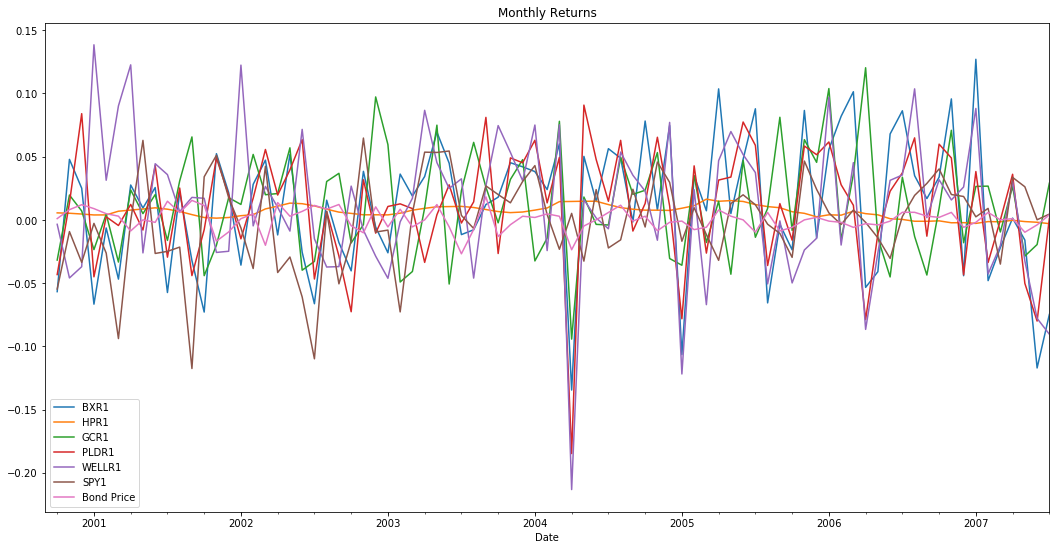

In [32]:
#Visualize the Monthly Return Relationships
monthly_returns.plot(figsize=(18,9), title = 'Monthly Returns')

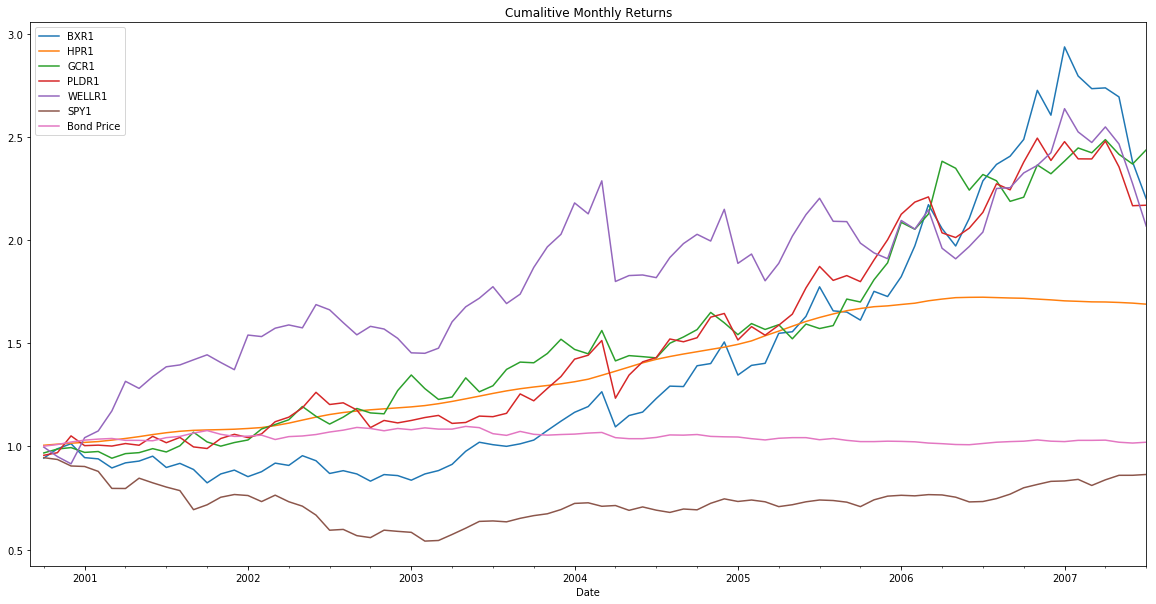

In [33]:
#Visualize the Cumaltive Monthly Returns
cumulative_returns = (1 + monthly_returns).cumprod()
cumulative_returns.plot(figsize= (20,10), title = 'Cumalitive Monthly Returns')

## 2000 Asset Class Risk Analysis

In [34]:
#Calculate Monthly Standard Deviation of Each Asset Class
monthly_std = monthly_returns.std()
print(monthly_std *100)

BXR1          5.294020
HPR1          0.494906
GCR1          4.046985
PLDR1         4.577576
WELLR1        5.683482
SPY1          3.597801
Bond Price    0.854919
dtype: float64


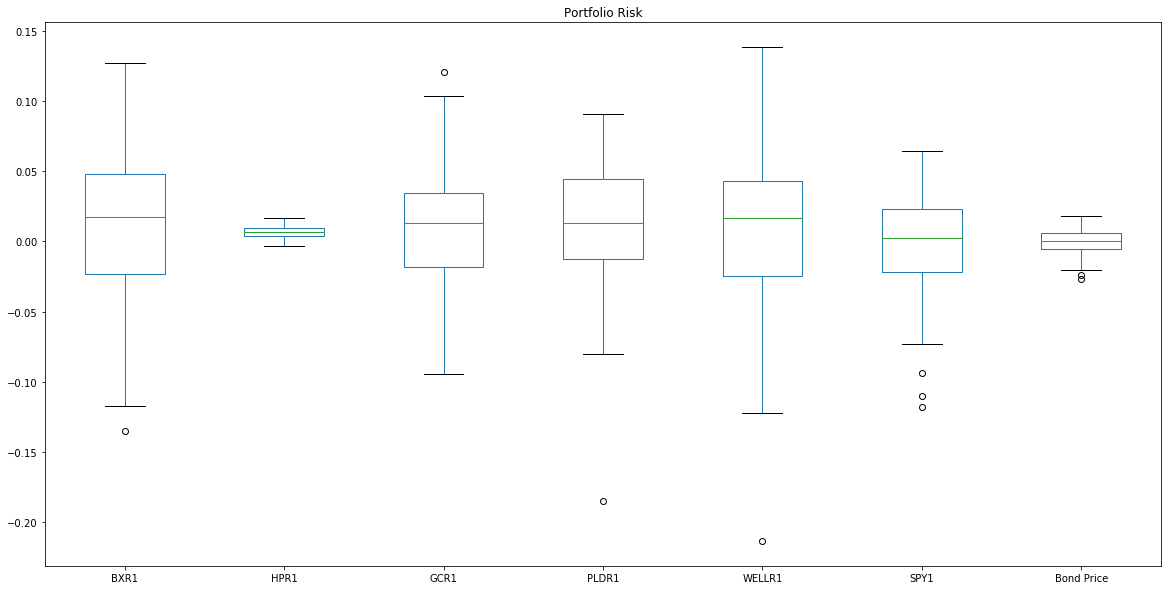

In [35]:
#Visualize Using a Box PLot
monthly_returns.plot.box(figsize=(20,10), title = 'Portfolio Risk')

In [36]:
#Sharpe Ratio Analysis
sharpe_ratios = ((monthly_returns)) / ((monthly_std))
print(sharpe_ratios.mean())

BXR1          0.208852
HPR1          1.298777
GCR1          0.289620
PLDR1         0.230504
WELLR1        0.185231
SPY1         -0.031409
Bond Price    0.032741
dtype: float64


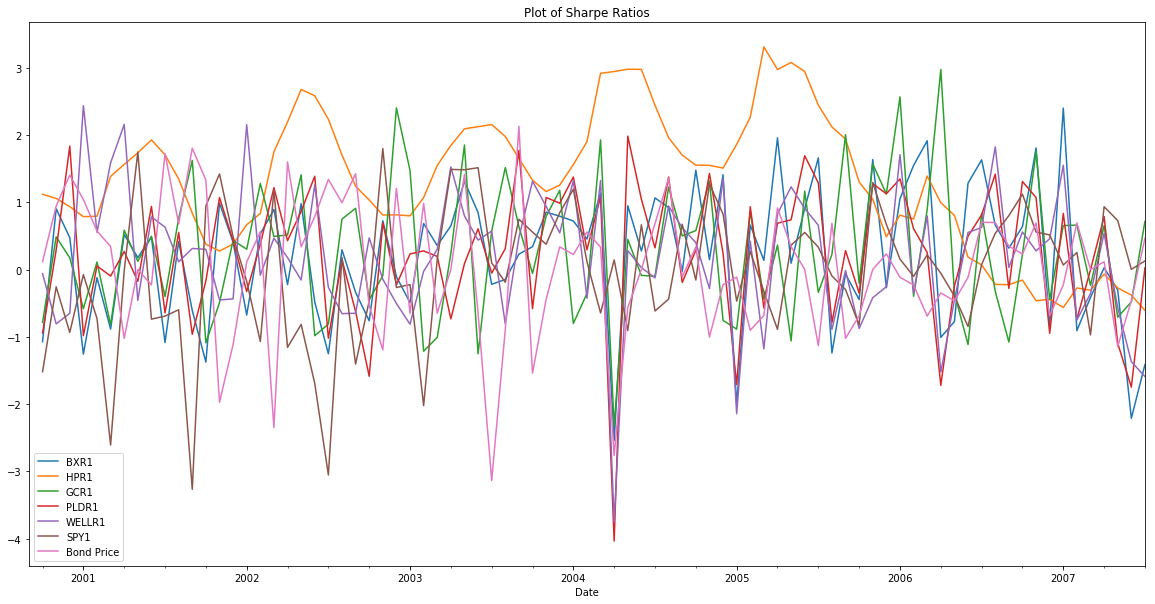

In [37]:
#Visualize Sharpe Ratios
sharpe_ratios.plot(figsize= (20,10), title = 'Plot of Sharpe Ratios')